<a href="https://colab.research.google.com/github/partizanos/advanced_image_processing/blob/master/AIP_TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercise 1. Single image compression

### Take any image x from the EXT YALE dataset given in the TP3.  Compress this image in its own optimal SVD basis as. Display the original and compressed images for k = {1, 2, ..., 10}

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import math
from scipy import fftpack 

!wget https://github.com/partizanos/advanced_image_processing/blob/master/EXT_YALE_B_Normal.mat?raw=true
!mv EXT_YALE_B_Normal.mat\?raw\=true data.mat

from scipy import io
v = io.loadmat('data.mat')

--2019-05-25 20:00:49--  https://github.com/partizanos/advanced_image_processing/blob/master/EXT_YALE_B_Normal.mat?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/partizanos/advanced_image_processing/raw/master/EXT_YALE_B_Normal.mat [following]
--2019-05-25 20:00:49--  https://github.com/partizanos/advanced_image_processing/raw/master/EXT_YALE_B_Normal.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/partizanos/advanced_image_processing/master/EXT_YALE_B_Normal.mat [following]
--2019-05-25 20:00:49--  https://raw.githubusercontent.com/partizanos/advanced_image_processing/master/EXT_YALE_B_Normal.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to 

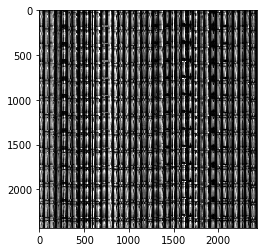

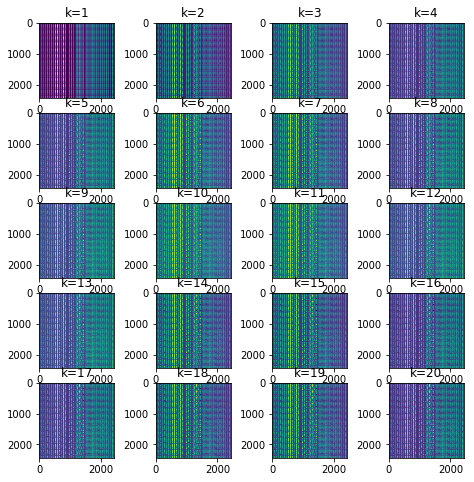

In [2]:
arr = np.array(v["faceData"])
plt.imshow(arr)
arr.shape
img = arr[:arr.shape[1], :arr.shape[1]]
plt.imshow(img, cmap = "gray")

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err


def svd_compress(img, k):
  U,s,V = np.linalg.svd(img,full_matrices=False)
  reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))  
  return reconst_matrix


fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
k=1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    im_dis = svd_compress(img, k)
    plt.imshow(im_dis)
    plt.title("k="+str(k))
    k+= 1

plt.show()

• Plot the dependency betwee the k and the MSE between the original and corresponding
compressed image.

Text(0, 0.5, 'MSE')

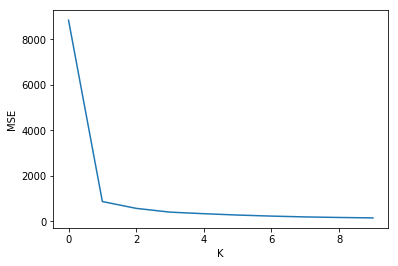

In [5]:
mses = []
Ks = [k for k in range(10)]
for k in Ks:
  im_dis = svd_compress(img, k)
  mses.append(mse(img, im_dis))

plt.plot( mses)
plt.xlabel("K")
plt.ylabel("MSE")


### Make a conclusion about the efficiency of such kind compression. What are advantages
and disadvantages of this approach? 

This method is using SVD optimally for this image.
But it will perform poorly for other images

## Exercise 2. Compression in a global learned basis

### Take a subset of similar and well aligned images X from the EXT YALE dataset. Learn an optimal basis W via the SVD decomposition of subset the X.

In [4]:
arr.shape[0], arr.shape[1]/64
sub = arr[:5, :5]
sub
# sub.reshape(38, 64, 64)
# imgs_38 = arr[:arr.shape[1],:arr.shape[1]].reshape((38, 64, 64))

array([[80, 94, 59, 16, 69],
       [81, 87, 67, 14, 67],
       [80, 88, 66, 14, 67],
       [79, 87, 74, 15, 69],
       [80, 88, 75, 15, 67]], dtype=uint8)